# Chapter 10: Unsupervised Learning

## Question 9
Uses the USArrests data

In [8]:
import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
usarrests=pd.read_csv('data/USArrests.csv').rename(columns={"Unnamed: 0":'State'})
print(usarrests.dtypes)
print(usarrests.isna().any())
usarrests.head()

State        object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object
State       False
Murder      False
Assault     False
UrbanPop    False
Rape        False
dtype: bool


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Hierarchical Clustering without scaling

Plotting the dendrogram

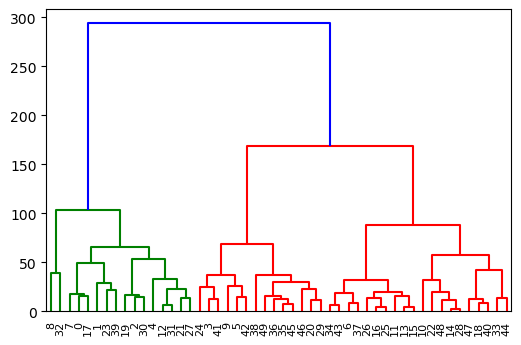

In [43]:
linkage_matrix=sch.linkage(usarrests.select_dtypes(exclude='object'),method="complete")

plt.figure(dpi=100)
sch.dendrogram(linkage_matrix)
plt.show()

In [44]:
clustering=AgglomerativeClustering(n_clusters=3,linkage="complete")
clustering.fit(usarrests.drop(columns=['State']))

clustering.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2])

In [54]:
clusters=dict()
for label,state in zip(clustering.labels_,usarrests['State']):
    clusters[label]=clusters.get(label,[])+[state]

for label,states in clusters.items():
    print(f'Cluster {label}: {", ".join(states)}\n')

Cluster 1: Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee

Cluster 2: Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas

Cluster 0: Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming



### Scaling variables to have Standard Deviation = 1

In [46]:
scaled=usarrests.copy()
for col in usarrests.select_dtypes(exclude='object').columns:
    scaled[col]=usarrests[col]/usarrests[col].std()
scaled.std()

Murder      1.0
Assault     1.0
UrbanPop    1.0
Rape        1.0
dtype: float64

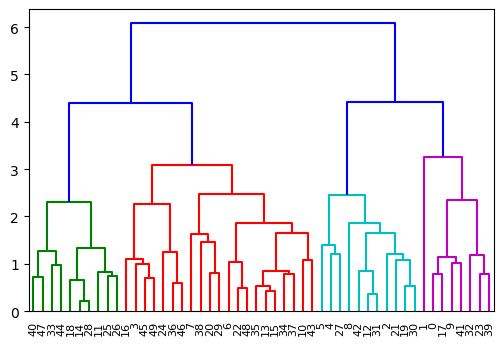

In [47]:
scl_linkage_matrix=sch.linkage(scaled.select_dtypes(exclude='object'),method="complete")

plt.figure(dpi=100)
sch.dendrogram(scl_linkage_matrix)
plt.show()

In [53]:
clustering_scaled=AgglomerativeClustering(n_clusters=4,linkage="complete")
clustering_scaled.fit(scaled.drop(columns=['State']))

clusters_scaled=dict()
for label,state in zip(clustering_scaled.labels_,scaled['State']):
    clusters_scaled[label]=clusters_scaled.get(label,[])+[state]
    
for label,states in clusters_scaled.items():
    print(f'Cluster {label}: {", ".join(states)}\n')

Cluster 0: Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee

Cluster 2: Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas

Cluster 1: Arkansas, Connecticut, Delaware, Hawaii, Indiana, Kansas, Kentucky, Massachusetts, Minnesota, Missouri, New Jersey, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, Utah, Virginia, Washington, Wisconsin, Wyoming

Cluster 3: Idaho, Iowa, Maine, Montana, Nebraska, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia

